<a href="https://colab.research.google.com/github/oliveirampo/airbnb_seatle/blob/main/run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analysing Seattle AirBnb Dataset

### 1. Business Understanding

This notebook analyzes the Seattle [AirBnb Open Data on Kaggle](https://www.kaggle.com/airbnb/seattle/data).


<b>Context</b>

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way.
As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

<b>Content</b>

The following Airbnb activity is included in this Seattle dataset:

* Listings, including full descriptions and average review score
* Reviews, including unique id for each reviewer and detailed comments
* Calendar, including listing id and the price and availability for that day

The 3 main questions for this analysis are:

* What are the distribution of listing prices by neighborhoods?

* How varied are the expensive neighborhoods in terms of property type?

* How well can we predict listing price?

### 2. Data Understanding

In this notebook only the listings dataset is analysed.

As a first step we will look at the data
and extract basic information.



### 2.0. Setup

* Run all cells of this section if running in Google Colab
* Run only first two cells otherwise, and ignore the rest of this section and jump to section 2.1

In [3]:
## Mount google drive - Click on the link and give authorization
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
## Change to working directory
workDir="/content/drive/MyDrive/github_projects/airbnb_seatle/"
%cd $workDir
%ls

/content/drive/MyDrive/github_projects/airbnb_seatle
images/  inp/  run.ipynb  src/


In [5]:
## Install miniconda

%env PYTHONPATH=

minicondaDir="/content/drive/MyDrive/github_projects/miniconda/"

%cd $minicondaDir

MINICONDA_INSTALLER_SCRIPT="Miniconda3-latest-Linux-x86_64.sh"
MINICONDA_PREFIX="/usr/local"

env: PYTHONPATH=
/content/drive/MyDrive/github_projects/miniconda


In [ ]:
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

In [ ]:
!conda install --channel defaults conda python=3.7 --yes
!conda update --channel defaults --all --yes

In [14]:
!python --version
import sys
sys.path

Python 3.7.10


['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

In [15]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.7/site-packages"))
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/usr/local/lib/python3.7/site-packages']

In [34]:
## Install extra packages
!conda install -c plotly plotly-orca

Solving environment: | / - done

# All requested packages already installed.



In [ ]:
# Configure plotly-orca

!apt update
!apt install xvfb
import plotly.io as pio
pio.orca.config.use_xvfb = True
#pio.orca.config.save() 

In [19]:
%cd $workDir

/content/drive/MyDrive/github_projects/airbnb_seatle


### 2.1. Initial Data Assessment

In [6]:
# libraries required
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import src.utils

%matplotlib inline

if not os.path.exists("images"):
    os.mkdir("images")

In [7]:
df_listing_detailed = pd.read_csv('inp/listings_detailed.csv')

#### List of columns in each data set


In [8]:
print('\nColumns of detailed listing:\n{}\n'.format(df_listing_detailed.columns))


Columns of detailed listing:
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_

#### Data set with detailed list

In [9]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [10]:
df_listing_detailed.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,...,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9419,https://www.airbnb.com/rooms/9419,20201223070540,2020-12-23,Glorious sun room w/ memory foambed,"Keeping you safe is our priority, we are adher...","Lots of restaurants (see our guide book) bars,...",https://a0.muscache.com/pictures/56645186/e5fb...,30559,https://www.airbnb.com/users/show/30559,Angielena,2009-08-09,"Seattle, Washington, United States",I am a visual artist who is the director of ...,within a few hours,100%,86%,t,https://a0.muscache.com/im/users/30559/profile...,https://a0.muscache.com/im/users/30559/profile...,Georgetown,8,8,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,...,t,0,1,2,268,2020-12-23,148,1,0,2010-07-30,2019-12-27,93.0,10.0,10.0,10.0,10.0,10.0,10.0,str-opli-19-003039,f,7,0,7,0,1.17
1,9531,https://www.airbnb.com/rooms/9531,20201223070540,2020-12-23,The Adorable Sweet Orange Craftsman,The Sweet Orange is a delightful and spacious ...,The neighborhood is awesome! Just far enough ...,https://a0.muscache.com/pictures/30470355/052c...,31481,https://www.airbnb.com/users/show/31481,Cassie,2009-08-13,"Seattle, Washington, United States",The Sweet Orange reflects my passion and zest ...,within a few hours,100%,63%,t,https://a0.muscache.com/im/users/31481/profile...,https://a0.muscache.com/im/users/31481/profile...,The Junction,0,0,"['email', 'phone', 'reviews', 'offline_governm...",t,...,t,18,48,78,353,2020-12-23,41,2,1,2012-01-12,2020-11-26,100.0,10.0,10.0,10.0,10.0,10.0,10.0,STR-OPLI-19-002182,f,2,2,0,0,0.38


#### Null Values

Null values can be problematic when training a model to predict a certain feature.
Below are columns sorted by null value count.

In [11]:
df_null = pd.DataFrame(np.sum(df_listing_detailed.isnull()), columns=['null_count'])
df_null[df_null['null_count'] > 0].sort_values(by='null_count', ascending=False)

,null_count
calendar_updated,4107
bathrooms,4107
license,1238
neighborhood_overview,1123
neighbourhood,1123
host_about,1079
review_scores_value,746
review_scores_checkin,746
review_scores_cleanliness,746
review_scores_accuracy,746


#### Neighborhoods

According to the source data, Seatlle has 88 neighborhoods organized in 17 groups.

In [12]:
df_neighbourhoods = pd.read_csv('inp/neighbourhoods.csv')
neighbohood = df_listing_detailed['neighbourhood_cleansed'].unique()
neighbohood

array(['Georgetown', 'Fairmount Park', 'Wallingford', 'High Point',
       'Whittier Heights', 'Loyal Heights', 'Mid-Beacon Hill',
       'Windermere', 'Eastlake', 'Alki', 'Fremont', 'Green Lake',
       'Seward Park', 'Harrison/Denny-Blaine', 'Portage Bay',
       'Phinney Ridge', 'Crown Hill', 'Columbia City', 'Belltown',
       'Lawton Park', 'North Admiral', 'North Queen Anne',
       'West Queen Anne', 'First Hill', 'Stevens', 'Broadway',
       'Arbor Heights', 'Greenwood', 'North Beacon Hill', 'Cedar Park',
       'Pike-Market', 'Lower Queen Anne', 'Mount Baker', 'Mann',
       'Genesee', 'Central Business District', 'Ravenna', 'Bryant',
       'University District', 'South Delridge', 'Atlantic', 'Broadview',
       'Adams', 'Maple Leaf', 'East Queen Anne', 'Minor',
       'Pioneer Square', 'Highland Park', 'West Woodland', 'Montlake',
       'Haller Lake', 'Madison Park', 'Fauntleroy', 'Leschi',
       'Matthews Beach', 'Madrona', 'Sunset Hill',
       'North Beach/Blue Ridge',

In [13]:
neighbourhood_group = df_listing_detailed['neighbourhood_group_cleansed'].unique()
neighbourhood_group

array(['Other neighborhoods', 'West Seattle', 'Delridge', 'Ballard',
       'Beacon Hill', 'Cascade', 'Seward Park', 'Central Area',
       'Capitol Hill', 'Rainier Valley', 'Downtown', 'Magnolia',
       'Queen Anne', 'Lake City', 'University District', 'Northgate',
       'Interbay'], dtype=object)

#### Average price of accommodation per neighborhood.

The price column has unwanted characters that would cause data processing issues later on,
so these characters will be removed and datatype will be converted to float.

In [15]:
df_listing_detailed['price'].head(5)

0     $55.00
1    $165.00
2    $125.00
3    $100.00
4     $66.00
Name: price, dtype: object

In [16]:
df_listing_detailed['price'] = df_listing_detailed['price'].str.replace("[$, ]", "").astype("float")
df_listing_detailed['price'].head(2)

0     55.0
1    165.0
Name: price, dtype: float64

The following image shows the location of all accommodations with price lower than $400.

(-122.4385, -122.2175)

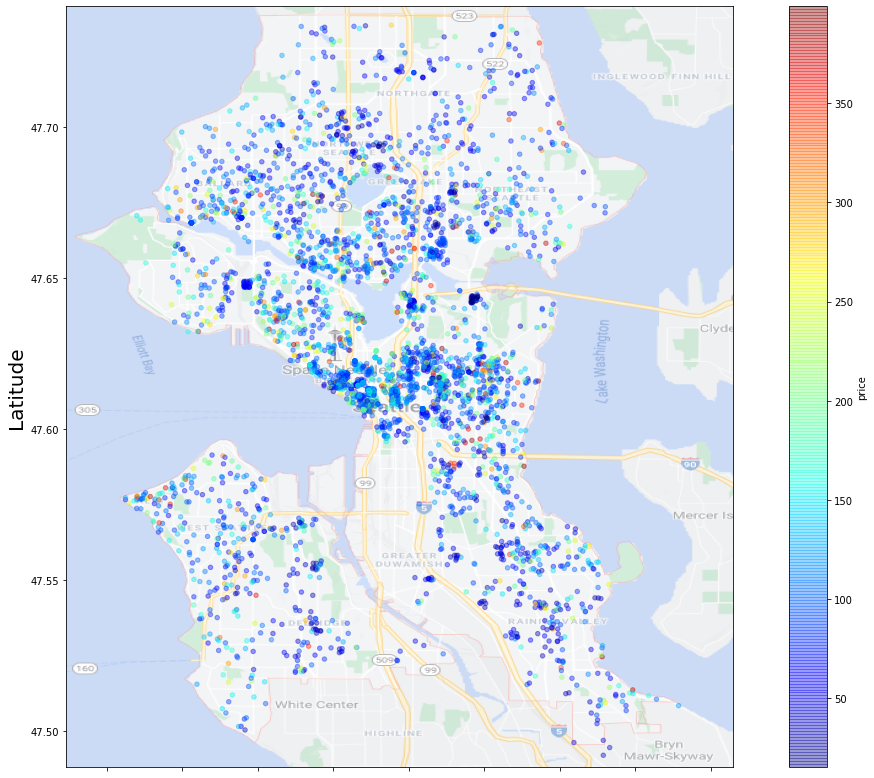

In [96]:
import matplotlib.image as mpimg

seattle_map_img = mpimg.imread('images/map_seattle.png')
df_tmp = df_listing_detailed[df_listing_detailed['price'] < 400]

# plot the data
ax = df_tmp.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    figsize=(20,14),
    c="price",
    cmap=plt.get_cmap("jet"),
    colorbar=True, 
    alpha=0.4,
)

# use our map with it's bounding coordinates
x1 = -122.4385
x2 = -122.2175
y1 = 47.4880
y2 = 47.740
plt.imshow(seattle_map_img, extent=[x1, x2, y1, y2], alpha=0.5) 

# add axis labels
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)

# set the min/max axis values - these must be the same as above
plt.ylim(y1, y2)
plt.xlim(x1, x2)

Sources:
* map: [Google Maps](https://www.google.com/maps)
* Plot locations and prices on a map: [Chris post.](https://towardsdatascience.com/lets-plot-airbnb-prices-on-a-map-of-singapore-ddbcae44fb69)

In [17]:
df_listing_detailed['price'].describe()

count    4107.000000
mean      131.661553
std       119.514389
min        15.000000
25%        76.000000
50%       100.000000
75%       145.000000
max      3638.000000
Name: price, dtype: float64

#### What are the distribution of listing prices by neighborhoods?

In [81]:
neighbourhood_list = df_listing_detailed['neighbourhood_cleansed'].unique().tolist()
fig_name = "images/property_type_count.png"
hist_fig = src.utils.plot_detailed_histogram('price', 'Listing Price', 'Count', neighbourhood_list,
                                             'neighbourhood_cleansed', df_listing_detailed, fig_name)
hist_fig.show()

The histogram above shows the distribution of price per neighborhood in Seattle.
The vast majority of prices listed are under $300.
Accommodations with higher price are also found, but much less likely.


Now, let's take a look at the mean price and its standard deviation
per neighborhood.

TODO - Why Top 10?

In [82]:
df_mean_std = df_listing_detailed.groupby(['neighbourhood_cleansed'], as_index=False).agg( {'price':['mean','std']})
df_mean_std.columns = df_mean_std.columns.droplevel(0)
df_mean_std = df_mean_std.rename(columns = {'': 'neighbourhood_cleansed'})
df_mean_std = df_mean_std.set_index('neighbourhood_cleansed')
df_mean_std = df_mean_std.sort_values(['mean'], ascending=False)
df_mean_std.head(10)

,mean,std
neighbourhood_cleansed,,
Portage Bay,250.727273,260.576319
Briarcliff,243.333333,245.001020
Meadowbrook,236.571429,309.538289
West Queen Anne,206.653333,160.373508
West Woodland,206.413043,527.664438
Southeast Magnolia,206.342857,293.216337
Windermere,190.700000,212.531854
East Queen Anne,181.000000,154.681491
Sunset Hill,180.571429,135.626904


The Portage Bay is the most expensive neighborhoods with the average listing exceeding $250.
Note that the standard deviation values are in general high.
This means that, the price of accommodation is spread over in these neighborhoods.
This observation is illustrated above with the distribution of the data for the top 10 neighborhoods.

In [83]:
top_10 = df_mean_std.index[:10].tolist()
top_10

['Portage Bay',
 'Briarcliff',
 'Meadowbrook',
 'West Queen Anne',
 'West Woodland',
 'Southeast Magnolia',
 'Windermere',
 'East Queen Anne',
 'Sunset Hill',
 'Cedar Park']

In [84]:
title = 'Price per Neighborhood'
fig_name = "images/price_per_neighborhood.png"
box_fig = src.utils.plot_box_data(df_listing_detailed, 'neighbourhood_cleansed', top_10,
                                  'price', 'Listing Price', title, fig_name)
box_fig.show()

The price variation is significant among the Top 10 neighborhoods.
This happens because the price of the accommodations depends not only on the location but also other attributes.

For instance,
the type of accommodation has a significant effect on the price,
as shown below for the West Queen Anne neighborhood.

In [85]:
neighbourhood_name = 'West Queen Anne'
title = 'Price in {} Neighborhood per Type of Property'.format(neighbourhood_name)
df_tmp = df_listing_detailed[df_listing_detailed['neighbourhood_cleansed'] == neighbourhood_name]
df_tmp = df_tmp.sort_values(by='price', ascending=False)

fig_name = "images/price_per_neighborhood_WQA.png"
box_fig = src.utils.plot_box_data(df_tmp, 'property_type', df_tmp['property_type'].unique(),
                                  'price', 'Listing Price', title, fig_name)
box_fig.show()

#### How does the property type impact listing price on a neighborhood?

Intuitively, the property type is likely to have a strong effect on the price.
To have an idea about this effect let's first observe the types of property per neighborhood
and second compute their average price.

To solve the first question, the dataframe is grouped by neighborhood and property type
in order to view the prevalence of different property types in the most expensive neighborhoods.

In [87]:
stacked_bar_df = pd.DataFrame(df_listing_detailed.loc[df_listing_detailed['neighbourhood_cleansed'].isin(top_10)].groupby(['neighbourhood_cleansed', 'property_type']).count()['id']).reset_index()
property_type_list = stacked_bar_df.property_type.unique().tolist()

title = 'Property Type Count in Top 10 Most Expensive Neighborhoods'
fig_name = "images/property_type_per_neighborhood.png"
stacked_bar_fig = src.utils.plot_stacked_data(top_10, property_type_list, 'property_type', stacked_bar_df, title, fig_name)
stacked_bar_fig.show()

In general, the most common property types are: "Entire house", "Entire apartment" and "Entire guest suite".
However, this is not true for every neighborhood.
For instance, in Portage Bay the most common type is a "Private room in house".


To solve the second question, a heat map of the mean list price of each type of property
for the top 10 neighborhoods is shown below.

In [88]:
# create a heat map showing the mean prices for the property types
# property_types = ['Entire house', 'Entire apartment', 'Entire guest suite', 'Entire guest suite', 'Entire guesthouse']
property_types = property_type_list[:]

# transform data to group it properly for the heatmap visualization using plotly
heatmap_filtered_df = df_listing_detailed.loc[df_listing_detailed['neighbourhood_cleansed'].isin(top_10) &
        df_listing_detailed['property_type'].isin(property_types)]
heatmap_filtered_df = pd.DataFrame(heatmap_filtered_df.groupby(['neighbourhood_cleansed', 'property_type']).mean()['price'])
heatmap_filtered_df = heatmap_filtered_df.reset_index()

title = 'Comparing Mean Price of Property for Top 10 Neighborhoods'
fig_name = "images/price_per_property_type.png"
heatmap_fig = src.utils.plot_heat_map(heatmap_filtered_df, property_types, top_10,
                                      'property_type', 'neighbourhood_cleansed', 'price', title, fig_name)
heatmap_fig.show()

For every neighborhood above,
the mean price of an entire house is the highest among the accommodations,
and particularly high in Portage Bay neighborhood.

Also note that
the price for the other types of properties among different neighborhoods
varies considerably less,
and some types of properties are only offered in a few neighborhoods.

#### How other factor influence the price of the accommodations?

Other factors that are likely to influence the price of the accommodation are:

* Room type.
* Number of bedrooms.
* Amenities.

In [122]:
def plot_heat_map_helper(df, neighborhoods, col_name, title, fig_name):
  """Transform data to group it properly for the heatmap visualization using plotly

  :param col_name: (str) Name of column with factors to be considered.
  :param neighborhoods: (arr) List of neighborhoods.
  :param title: (str) Title of plot.
  :param fig_name: (str) Name of output file.
  :return heatmap_fig: (figure object)
  """
  
  factor_list = df[col_name].unique()
  try:
    factor_list = factor_list[~np.isnan(factor_list)]
  except TypeError:
    pass

  heatmap_filtered_df = df.loc[df['neighbourhood_cleansed'].isin(neighborhoods)]
  heatmap_filtered_df = pd.DataFrame(heatmap_filtered_df.groupby(['neighbourhood_cleansed', col_name]).mean()['price'])
  heatmap_filtered_df = heatmap_filtered_df.reset_index()

  heatmap_fig = src.utils.plot_heat_map(heatmap_filtered_df, factor_list, neighborhoods,
                                        col_name, 'neighbourhood_cleansed', 'price', title, fig_name)
  return heatmap_fig


In [120]:
col_name = 'bedrooms'
title = 'Comparing Mean Price of Property for Top 10 Neighborhoods per Number of Bedooms'
fig_name = "images/price_per_number_of_bedrooms.png"
heatmap_fig = plot_heat_map_helper(df_listing_detailed, top_10, col_name, title, fig_name)
heatmap_fig.show()

In [123]:
col_name = 'room_type'
title = 'Comparing Mean Price of Property for Top 10 Neighborhoods per Room Type'
fig_name = "images/price_per_room_type.png"
heatmap_fig = plot_heat_map_helper(df_listing_detailed, top_10, col_name, title, fig_name)
heatmap_fig.show()

In [117]:
df_listing_detailed.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

### 3. Data Preparation

The third main question is how well we can predict the price of accommodation.
To solve it, the data needs to be prepared.

- The price column has already been formatted
(symbol removed, values converted to float).

- Remove complete empty columns ("bathrooms").

- Missing values need to be changed to numeric variables
using the mean of the columns.

- Categorical variables need to be created by adding dummy columns.

See src.utils.clean_data()

In [89]:
df_listing_detailed['bathrooms'].unique()

array([nan])

### 4. Modelling

In order to accurately predict the accommodation price
we need to answer the following two questions:

1. Which model?
2. Which independent variables?

For the first one cross-validation will be used.
For the second one intuition and trial-and-error attempts will be used.
For that we want to keep the features with significant impact on the price,
with relatively few missing values,
and with a manageable amount of unique values (in case of a categorical variable).

The src.utils.clean_data function is used to split the data into the dependent and independent variables.

#### 4.1. Feature Selection


The column "amenity" was naively processed by searching for keywords in the description.
List of keywords in provided in "inp/key_words.txt".

In [ ]:
key_words = src.utils.read_key_words('inp/key_words.txt')
selected_key_words = src.utils.add_amenities(df_listing_detailed, key_words)

In [ ]:
# select a subset of variables from the dataset
selected_features = ["price", "bedrooms", "accommodates", "reviews_per_month", "review_scores_rating",
                    "neighbourhood_cleansed", "property_type"]

for col in selected_key_words:
    selected_features.append(col)

selected_features

['price',
 'bedrooms',
 'accommodates',
 'reviews_per_month',
 'review_scores_rating',
 'neighbourhood_cleansed',
 'property_type',
 'amenity_Bathtub',
 'amenity_Beachfront',
 'amenity_Bikes',
 'amenity_Bluetooth_sound_system',
 'amenity_Breakfast',
 'amenity_Cable_TV',
 'amenity_Ceiling_fan',
 'amenity_conditioning',
 'amenity_Fire_pit',
 'amenity_Fireplace_guards',
 'amenity_Freezer',
 'amenity_Full_kitchen',
 'amenity_Garden_or_backyard',
 'amenity_Gym',
 'amenity_HBO_Max',
 'amenity_HDTV',
 'amenity_heating',
 'amenity_Outdoor_dining_area',
 'amenity_Outdoor_furniture',
 'amenity_Outdoor_Grill_gas_stove',
 'amenity_Pets_allowed',
 'amenity_Piano',
 'amenity_Pool',
 'amenity_premium_cable',
 'amenity_Private_hot_tub',
 'amenity_Private_living_room',
 'amenity_refrigerator',
 'amenity_Sauna',
 'amenity_Ski-in/Ski-out',
 'amenity_Smart_lock',
 'amenity_Washer',
 'amenity_Wifi']

In [ ]:
filtered_df = df_listing_detailed[selected_features]
filtered_df.head(5)

,price,bedrooms,accommodates,reviews_per_month,review_scores_rating,neighbourhood_cleansed,property_type,amenity_Bathtub,amenity_Beachfront,amenity_Bikes,amenity_Bluetooth_sound_system,amenity_Breakfast,amenity_Cable_TV,amenity_Ceiling_fan,amenity_conditioning,amenity_Fire_pit,amenity_Fireplace_guards,amenity_Freezer,amenity_Full_kitchen,amenity_Garden_or_backyard,amenity_Gym,amenity_HBO_Max,amenity_HDTV,amenity_heating,amenity_Outdoor_dining_area,amenity_Outdoor_furniture,amenity_Outdoor_Grill_gas_stove,amenity_Pets_allowed,amenity_Piano,amenity_Pool,amenity_premium_cable,amenity_Private_hot_tub,amenity_Private_living_room,amenity_refrigerator,amenity_Sauna,amenity_Ski-in/Ski-out,amenity_Smart_lock,amenity_Washer,amenity_Wifi
0,55.0,1.0,2,1.17,93.0,Georgetown,Private room in apartment,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,165.0,2.0,4,0.38,100.0,Fairmount Park,Entire house,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2,125.0,2.0,3,0.50,100.0,Fairmount Park,Entire guest suite,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3,100.0,1.0,4,0.84,91.0,Wallingford,Entire apartment,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
4,66.0,2.0,4,0.55,96.0,Fairmount Park,Entire house,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True


In [ ]:
X, y = src.utils.clean_data(filtered_df.copy())

#### 3.2. Split into Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=123)

#### 3.3. Train Models and Select Best One via Cross-validation


In [ ]:
print('\nModel 01')
model_1 = src.utils.model_01(X_train, y_train)
print('\nModel 02')
model_2 = src.utils.model_02(X_train, y_train)
print('\nModel 03')
model_3 = src.utils.model_03(X_train, y_train)
print('\nModel 04')
model_4 = src.utils.model_04(X_train, y_train)
print('\nModel 05')
model_5, scaler = src.utils.model_05(X_train, y_train)


Model 01
Linear Regression: -2.28e+56 7.18e+56

Model 02
Best results for test set Lasso: 0.22 (0.05)
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=True)

Model 03
Best results for test set KernelRidge: 0.56 (0.07)
KernelRidge(alpha=0.1, coef0=1, degree=2, gamma=None, kernel='rbf',
            kernel_params=None)

Model 04
Best results for test set RandomForestRegressor: 0.54 (0.06)
RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
Time 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.

/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



### 5. Results

In [ ]:
model_name = "Model_03"
model = model_3

src.utils.print_test_score(model_name, model, X_test, y_test)

The r^2 score for Model_03 on the test data was 0.32006918098937764 on 1233 values.
The RMSE was 15127.905624755267


#### Scatter Plot Visualizing Linear Model with Predicted vs Actual values

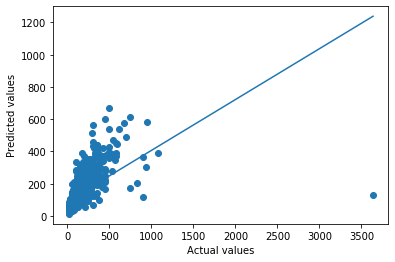

In [ ]:
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

src.utils.plot_train_vs_test_data(y_test, y_test_preds)
plt.show()

The prediction of the results is not so good, with
r^2 value equal to 0.56 and 0.32 for the train and test sets, respectively.

The prediction gets worse as the real price increases.
As we saw earlier, most of the listed prices are below $300.
Thus, this worse predictions could be a result of the lower occurrence of expensive accommodations.

#### Residual Plot of Training data vs Test data

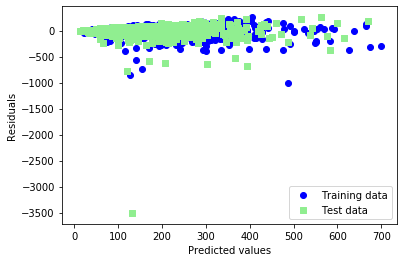

In [ ]:
src.utils.plot_train_and_test_data(y_train, y_test, y_train_preds, y_test_preds)
plt.show()

### 5. Conclusion

* Price of accommodation roughly follows a normal distribution,
 with mean value equal to $90-100,
 and with a long tail of expensive properties.

* The most common property types are: "Entire house", "Entire apartment" and "Entire guest suite".

* For every neighborhood among the ten most expensive ones,
  the mean price of an entire house is the highest among the types of accommodations.

* More work can be done to:

  1. Look in more detail at the mean price of each type of property per neighborhood.

  2. Predict listing price. Feature importance could be used to better select features.